In [ ]:
import ast 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import statsmodels.api as sm

# Set the path to the file you'd like to load
file_path = 'M:/3_datasets/covid_19_data.csv'

# Load the latest version
df = pd.read_csv(file_path)

#clean
df.columns = df.columns.str.replace(' ', '_')
df['Last_Update'] = pd.to_datetime(df['Last_Update'], format='mixed') 
df['ObservationDate']= pd.to_datetime(df['ObservationDate'])

df.set_index('SNo', inplace=True)

df['Country/Region']= df['Country/Region'].fillna('else')
df['Province/State']= df['Province/State'].fillna('else')

df[['Confirmed','Deaths','Recovered']] = df[['Confirmed','Deaths','Recovered']].clip(lower=0) 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 306429 entries, 1 to 306429
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ObservationDate  306429 non-null  datetime64[ns]
 1   Province/State   306429 non-null  object        
 2   Country/Region   306429 non-null  object        
 3   Last_Update      306429 non-null  datetime64[ns]
 4   Confirmed        306429 non-null  float64       
 5   Deaths           306429 non-null  float64       
 6   Recovered        306429 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(2)
memory usage: 18.7+ MB


In [15]:
df

,ObservationDate,Province/State,Country/Region,Last_Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
306425,2021-05-29,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306426,2021-05-29,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306427,2021-05-29,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0


In [16]:
df_California= df[df['Province/State'] == 'California'].copy() # California data only
df_Texas= df[df['Province/State'] == 'Texas'].copy() # Texas data only
df_Florida= df[df['Province/State'] == 'Florida'].copy() # Florida data only

In [17]:
# make a daily new cases column
df_California['DailyNewCases']= df_California['Confirmed'].diff().fillna(0)
df_Texas['DailyNewCases']= df_Texas['Confirmed'].diff().fillna(0)
df_Florida['DailyNewCases']= df_Florida['Confirmed'].diff().fillna(0)

In [18]:
# make a daily new deaths column
df_California['DailyNewdeathes']= df_California['Deaths'].diff().fillna(0)
df_Texas['DailyNewdeathes']= df_Texas['Deaths'].diff().fillna(0)
df_Florida['DailyNewdeathes']= df_Florida['Deaths'].diff().fillna(0)

In [45]:
df_concat= pd.concat([df_California, df_Texas, df_Florida])
df_table= df_concat[['ObservationDate', 'Province/State', 'DailyNewCases', 'DailyNewdeathes']].set_index('ObservationDate')
df_table

,Province/State,DailyNewCases,DailyNewdeathes
ObservationDate,,,
2020-01-26,California,0.0,0.0
2020-01-27,California,0.0,0.0
2020-01-28,California,0.0,0.0
2020-01-29,California,0.0,0.0
2020-01-30,California,0.0,0.0
...,...,...,...
2021-05-25,Florida,1874.0,80.0
2021-05-26,Florida,2327.0,66.0
2021-05-27,Florida,2338.0,86.0


In [20]:
df_pivot_DailyNewCases= df_table.pivot_table(index='ObservationDate', columns='Province/State', values='DailyNewCases').fillna(0)
df_pivot_DailyNewCases

Province/State,California,Florida,Texas
ObservationDate,,,
2020-01-26,0.0,0.0,0.0
2020-01-27,0.0,0.0,0.0
2020-01-28,0.0,0.0,0.0
2020-01-29,0.0,0.0,0.0
2020-01-30,0.0,0.0,0.0
...,...,...,...
2021-05-25,1443.0,1874.0,2528.0
2021-05-26,1122.0,2327.0,2193.0
2021-05-27,5339.0,2338.0,1601.0


In [21]:
df_pivot_DailyNewdeathes= df_table.pivot_table(index='ObservationDate', columns='Province/State', values='DailyNewdeathes').fillna(0)
df_pivot_DailyNewdeathes

Province/State,California,Florida,Texas
ObservationDate,,,
2020-01-26,0.0,0.0,0.0
2020-01-27,0.0,0.0,0.0
2020-01-28,0.0,0.0,0.0
2020-01-29,0.0,0.0,0.0
2020-01-30,0.0,0.0,0.0
...,...,...,...
2021-05-25,37.0,80.0,39.0
2021-05-26,31.0,66.0,62.0
2021-05-27,151.0,86.0,51.0


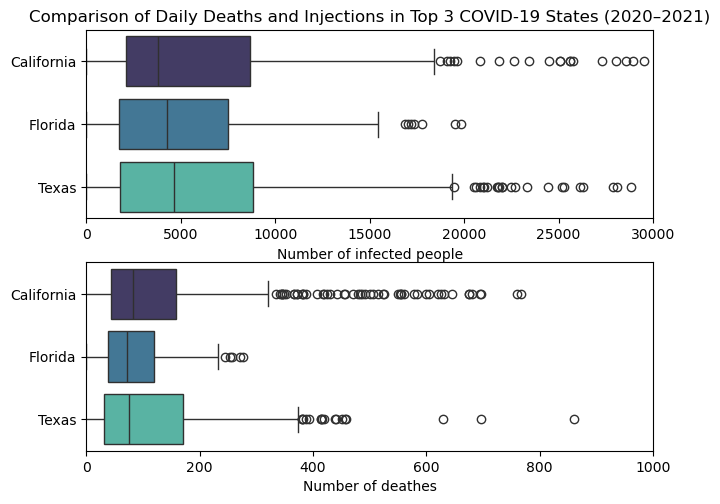

In [22]:
fig, ax = plt.subplots(2, 1)

plt.tight_layout()



sns.boxplot(data=df_pivot_DailyNewCases, ax=ax[0], palette='mako', orient="h")
ax[0].set_title('Comparison of Daily Deaths and Injections in Top 3 COVID-19 States (2020–2021)')
ax[0].set_xlabel('Number of infected people')
ax[0].set_ylabel('')
ax[0].set_xlim(0, 30000)

######################


sns.boxplot(data=df_pivot_DailyNewdeathes, ax=ax[1], palette='mako', orient="h")
ax[1].set_xlabel('Number of deathes')
ax[1].set_ylabel('')
ax[1].set_xlim(0, 1000)
plt.show()